In [165]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [166]:
df = pd.read_csv('mw_pw_profiles.csv')

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416712 entries, 0 to 416711
Data columns (total 58 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   player_id              416712 non-null  object 
 1   match_id               416712 non-null  object 
 2   gender                 416712 non-null  object 
 3   balls_per_over         416712 non-null  int64  
 4   start_date             416712 non-null  object 
 5   series_name            414752 non-null  object 
 6   match_type             416712 non-null  object 
 7   name_x                 416712 non-null  object 
 8   runs_scored            416712 non-null  int64  
 9   player_out             416712 non-null  int64  
 10  balls_faced            416712 non-null  int64  
 11  fours_scored           416712 non-null  int64  
 12  sixes_scored           416712 non-null  int64  
 13  catches_taken          416712 non-null  int64  
 14  run_out_direct         416712 non-nu

In [168]:
cols_batting = ['runs_scored', 'balls_faced', 'fours_scored', 'sixes_scored']
cols_bowling = ['balls_bowled', 'runs_conceded', 'wickets_taken', 'lbw_done', 'dot_balls_as_bowler', 'bowled_done', 'maidens',]

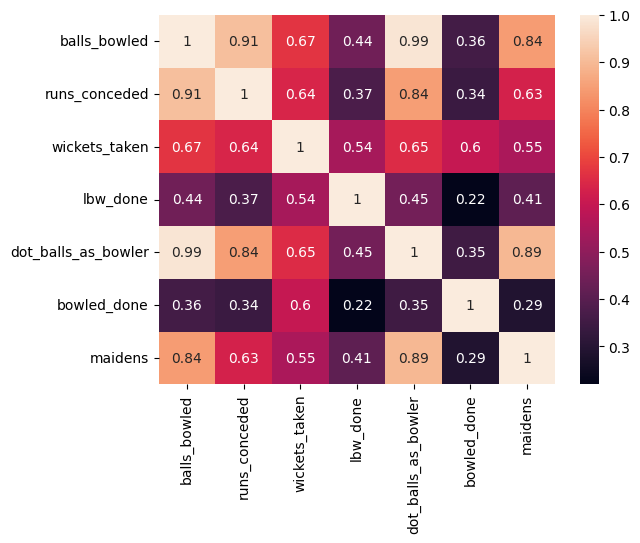

In [169]:
sns.heatmap(df[cols_bowling].corr(), annot=True)
plt.show()

In [170]:
## dropping similar columns eg, balls_bowled

In [171]:
from sklearn.preprocessing import MinMaxScaler

mMscaler = MinMaxScaler()
df_bowling_normalised = mMscaler.fit_transform(df[cols_bowling])
print(df_bowling_normalised)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [172]:
# prompt: convert df_bowling into a pd dataframe

df_bowling = pd.DataFrame(df_bowling_normalised, columns=cols_bowling)
print(df_bowling.head())

   balls_bowled  runs_conceded  wickets_taken  lbw_done  dot_balls_as_bowler  \
0           0.0            0.0            0.0       0.0                  0.0   
1           0.0            0.0            0.0       0.0                  0.0   
2           0.0            0.0            0.0       0.0                  0.0   
3           0.0            0.0            0.0       0.0                  0.0   
4           0.0            0.0            0.0       0.0                  0.0   

   bowled_done  maidens  
0          0.0      0.0  
1          0.0      0.0  
2          0.0      0.0  
3          0.0      0.0  
4          0.0      0.0  


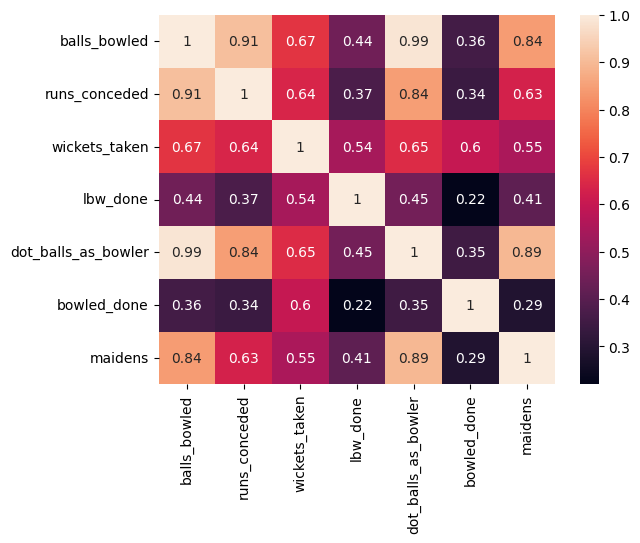

In [173]:
df_bowling_normalised = pd.DataFrame(df_bowling_normalised, columns=cols_bowling)
sns.heatmap(df_bowling_normalised.corr(), annot=True)
plt.show()

In [174]:
X = df_bowling_normalised
y = df['fantasy_score_bowling']

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [176]:
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [177]:
# Network architecture: 7 inputs → 4 hidden → 1 output

input_size = X.shape[1]
hidden_size = 4
output_size = 1

# Random Initialisation of weights and biases
np.random.seed(0)
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

In [179]:

def relu(z):
    return np.maximum(0, z)
def relu_derivative(z):
    return (z > 0).astype(float)
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)
def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true) / (y_true.size)

In [178]:
epochs = 1000
lr = 0.01

for epoch in range(epochs):
  Z1 = np.dot(X_train, W1)+b1
  A1 = relu(Z1)
  Z2 = np.dot(A1, W2)+b2
  y_pred = Z2

  # loss:
  loss = mse(y_train, y_pred)

  ### backpropagation

  # basic formula: W1 = W1 - lr* (dcost/dw1)   --> (partial derivative)
  # breaking dcost/dw1 = dcost / dy_pred * dypred / da1 * drelu(Z1)/dZ1 * d(Z1)/dw1

  dZ2 = mse_derivative(y_train, y_pred)
  dW2 = A1.T.dot(dZ2)
  db2 = np.sum(dZ2, axis=0, keepdims=True)

  dA1 = dZ2.dot(W2.T)
  dZ1 = dA1 * relu_derivative(Z1)
  dW1 = X_train.T.dot(dZ1)
  db1 = np.sum(dZ1, axis=0, keepdims=True)


  # --- Update weights ---
  W2 -= lr * dW2
  b2 -= lr * db2
  W1 -= lr * dW1
  b1 -= lr * db1

  if epoch % 100 == 0:
    print(f"Epoch {epoch}, Loss: {loss:.4f}")
print(f"Model ready!  |  Loss: {loss:.4f}")


Epoch 0, Loss: 1372.9525
Epoch 100, Loss: 192.3775
Epoch 200, Loss: 93.6390
Epoch 300, Loss: 82.6581
Epoch 400, Loss: 92.2289
Epoch 500, Loss: 83.0471
Epoch 600, Loss: 79.5132
Epoch 700, Loss: 77.5485
Epoch 800, Loss: 76.2971
Epoch 900, Loss: 75.3408
Model ready!  |  Loss: 81.0698


In [180]:
Z1_test = X_test.dot(W1) + b1
A1_test = relu(Z1_test)
y_test_pred = A1_test.dot(W2) + b2

test_loss = mse(y_test, y_test_pred)
print(f"Test MSE: {test_loss:.4f}")

Test MSE: 73.7254


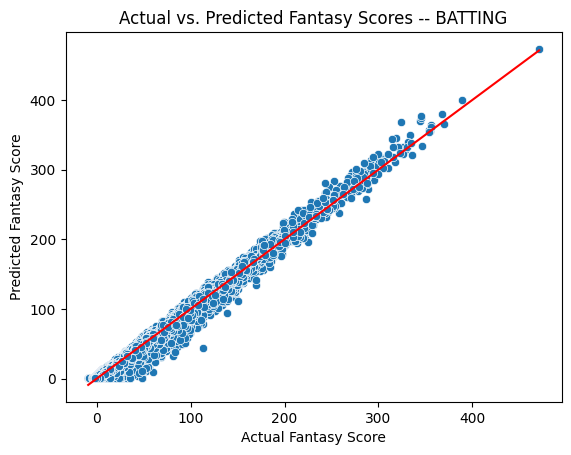

In [181]:

sns.scatterplot(x=plot_data['Actual'], y=plot_data['Predicted'])

# Diagonal line = perfect prediction
plt.plot([plot_data['Actual'].min(), plot_data['Actual'].max()],
         [plot_data['Actual'].min(), plot_data['Actual'].max()],
         color='red')
plt.xlabel('Actual Fantasy Score')
plt.ylabel('Predicted Fantasy Score')
plt.title('Actual vs. Predicted Fantasy Scores')
plt.show()
